In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('data.csv',error_bad_lines=False) 
df = pd.DataFrame(df)
df = df.sample(n=10000)
from io import StringIO
col = ['label','url']
df = df[col]
#Deleting nulls
df = df[pd.notnull(df['url'])]
#more settings for our data manipulation
df.columns = ['label', 'url']
df['category_id'] = df['label'].factorize()[0]
category_id_df = df[['label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)
df

C:\Users\asus\AppData\Local\Temp\ipykernel_14260\1359485487.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('data.csv',error_bad_lines=False)


,label,url,category_id
86667,good,en.wikivisual.com/index.php/Ian_Campbell_(artist),0
46712,good,answers.yahoo.com/question/index?qid=200711210...,0
405083,bad,www.gebrvanorsouw.nl/g76gyui,1
245208,good,forumjar.com/list/360,0
35538,bad,mun-planhoso.pt/components/wellsfargo/index_lo...,1
...,...,...,...
62511,good,cires.colorado.edu/~bilham/Gujarat2001.html,0
71871,good,ech.case.edu/ech-cgi/article.pl?id=GG2,0
12870,bad,mail-maker.com/fe1/w/BNStY3wLkvA6ZGZza62IzufQYhv,1
311813,good,nytimes.com/1995/10/24/sports/vada-pinson-57-c...,0


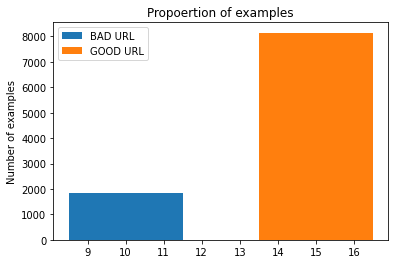

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
BAD_len = df[df['label'] == 'bad'].shape[0]
GOOD_len = df[df['label'] == 'good'].shape[0]
plt.bar(10,BAD_len,3, label="BAD URL")
plt.bar(15,GOOD_len,3, label="GOOD URL")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

<AxesSubplot:>

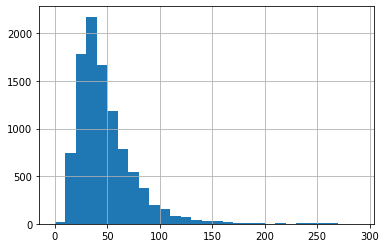

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
lens = df.url.str.len()
lens.hist(bins = np.arange(0,300,10))

In [5]:
def getTokens(input):
    tokensBySlash = str(input.encode('utf-8')).split('/')
    allTokens=[]
    for i in tokensBySlash:
        tokens = str(i).split('-')
        tokensByDot = []
        for j in range(0,len(tokens)):
            tempTokens = str(tokens[j]).split('.')
            tokentsByDot = tokensByDot + tempTokens
        allTokens = allTokens + tokens + tokensByDot
    allTokens = list(set(allTokens))

    if 'com' in allTokens:
        allTokens.remove('com')
    return allTokens

In [6]:
y = [d[1]for d in df] #labels
myUrls = [d[0]for d in df] #urls
vectorizer = TfidfVectorizer( tokenizer=getTokens ,use_idf=True, smooth_idf=True, sublinear_tf=False)
features = vectorizer.fit_transform(df.url).toarray()
labels = df.label
features.shape

(10000, 24245)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.20, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)
clf = LogisticRegression(random_state=0) 
clf.fit(X_train,y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.87025
test accuracy = 0.8505


Text(0.5, 15.0, 'Predicted')

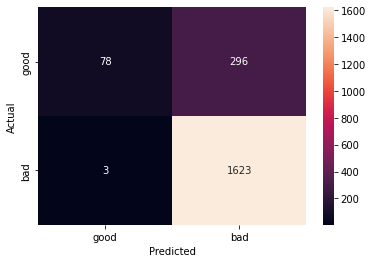

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [9]:
X_predict = ['yahoo.fr','www.radsport-voggel.de/wp-admin/includes/log.exe','hello.ru']
X_predict = vectorizer.transform(X_predict)
y_Predict = clf.predict(X_predict)
print(y_Predict)

['good' 'bad' 'good']
